In [2]:
import pandas as pd
import numpy as np

In [5]:
customers = pd.read_csv("Mall_Customers.csv")

In [6]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
features = ["Annual Income (k$)", "Spending Score (1-100)", "Age"]

In [16]:
customers = customers.dropna(subset=features)
data = customers[features].copy()

In [17]:
data

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32


In [18]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [19]:
data

,Annual Income (k$),Spending Score (1-100),Age
0,1.000000,4.877551,1.192308
1,1.000000,9.163265,1.576923
2,1.081967,1.510204,1.384615
3,1.081967,8.755102,1.961538
4,1.163934,4.979592,3.500000
...,...,...,...
195,9.606557,8.959184,4.269231
196,10.098361,3.755102,6.192308
197,10.098361,8.448980,3.692308
198,11.000000,2.734694,3.692308


In [20]:
data.head()

,Annual Income (k$),Spending Score (1-100),Age
0,1.000000,4.877551,1.192308
1,1.000000,9.163265,1.576923
2,1.081967,1.510204,1.384615
3,1.081967,8.755102,1.961538
4,1.163934,4.979592,3.500000


In [21]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    print(centroids)
    return pd.concat(centroids, axis=1)

In [22]:
centroids = random_centroids(data, 5)
centroids

[Annual Income (k$)        6.081967
Spending Score (1-100)    2.938776
Age                       1.769231
dtype: float64, Annual Income (k$)        6.163934
Spending Score (1-100)    5.795918
Age                       4.653846
dtype: float64, Annual Income (k$)        1.737705
Spending Score (1-100)    2.530612
Age                       2.153846
dtype: float64, Annual Income (k$)        6.901639
Spending Score (1-100)    9.673469
Age                       1.384615
dtype: float64, Annual Income (k$)        1.327869
Spending Score (1-100)    6.918367
Age                       5.230769
dtype: float64]


C:\Users\hj101658\AppData\Local\Temp\ipykernel_45040\4278734707.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
Annual Income (k$),6.081967,6.163934,1.737705,6.901639,1.327869
Spending Score (1-100),2.938776,5.795918,2.530612,9.673469,6.918367
Age,1.769231,4.653846,2.153846,1.384615,5.230769


In [23]:
centroids

,0,1,2,3,4
Annual Income (k$),6.081967,6.163934,1.737705,6.901639,1.327869
Spending Score (1-100),2.938776,5.795918,2.530612,9.673469,6.918367
Age,1.769231,4.653846,2.153846,1.384615,5.230769


In [24]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [25]:
labels = get_labels(data, centroids)

In [26]:
labels.value_counts()

1    78
4    55
3    35
0    22
2    10
Name: count, dtype: int64

In [27]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [29]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

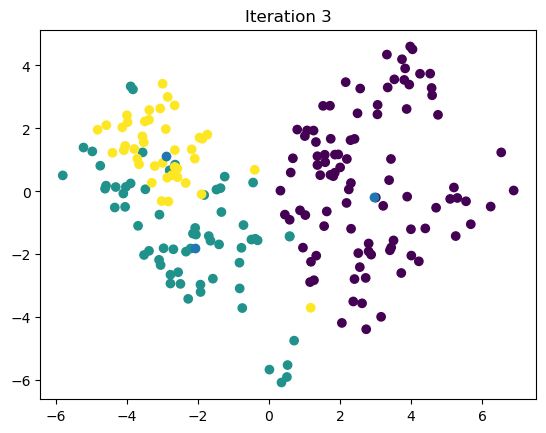

In [30]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [31]:
centroids

,0,1,2
Annual Income (k$),4.277302,2.933628,6.797082
Spending Score (1-100),3.852436,6.077486,8.893946
Age,7.025057,2.143170,3.790283


In [32]:
labels.value_counts()

0    95
1    64
2    41
Name: count, dtype: int64

In [36]:
customers[labels == 0][["CustomerID"] + features]

,CustomerID,Annual Income (k$),Spending Score (1-100),Age
6,7,18,6,35
8,9,19,3,64
10,11,19,14,67
12,13,20,15,58
14,15,20,13,37
...,...,...,...,...
188,189,103,17,41
190,191,103,23,34
192,193,113,8,33
194,195,120,16,47


In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(5)
kmeans.fit(data)

C:\Users\hj101658\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hj101658\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\hj101658\AppData\Local\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hj101658\AppData\Local\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executab

KMeans(n_clusters=5)

In [39]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3,4
Annual Income (k$),7.024590,6.827869,3.122951,3.237140,4.366511
Spending Score (1-100),2.608643,9.216837,4.288265,7.002815,6.036443
Age,5.473982,3.860577,6.581731,2.366048,9.317308


In [40]:
kmeans.predict([[20,13,37]])

C:\Users\hj101658\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)